In [27]:
from bbh.sim import GadgetSnapshot, ParticleType
from physt import h1, h2, histogramdd

import numpy as np
import matplotlib.pyplot as plt
import physt

%matplotlib inline

# Messing with $\epsilon$ parameter

`{
  "magi_dir": "/hb/home/sdenglis/magi/build",
  "config": {
    "name": "testrun",
    "unit": 1,
    "components": [
      {
        "ctype": 7,
        "params": [
          6060.0,
          0.00117,
          2.1,
          1,
          2
        ],
        "truncate": [
          20.0,
          4.0
        ],
        "n_particles": null
      },
      {
        "ctype": 8,
        "params": [
          0,
          5.0,
          45.0,
          0.0,
          1.0,
          2.78,
          1.0,
          5.0
        ],
        "truncate": [
          100.0,
          10.0
        ],
        "n_particles": null
      },
      {
        "ctype": 1000,
        "params": [
          10000.0
        ],
        "truncate": null,
        "n_particles": null
      }
    ]
  },
  "magi_args": {
    "Ntot": 65536,
    "eps": 1e-13,
    "ft": 1,
    "eta": 0.5,
    "snapshotInterval": 25.0,
    "saveInterval": 140.0
  }
}
`

default: "eps": 1e-13, large: "eps": 1e-05, small: "eps": 1e-20

In [28]:
var = {}
for n in range(8):
    var[n] = "eps/snap_default/snapshot_00%s" % n

In [29]:
%%time
snap_listD = {}
for snap in var:
    with open(var[snap], "rb") as binary_file:
        data = binary_file.read()
    snap_listD[snap] = GadgetSnapshot()
    snap_listD[snap].parse(data)

Wall time: 2.21 s


Wall time: 1.12 s


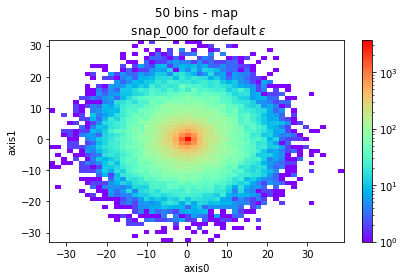

In [30]:
%%time
h_2 = h2(snap_listD[0].pos.T[0], snap_listD[0].pos.T[1], 50, name="50 bins - map\n snap_000 for default $\epsilon$")
h_2.plot("map", alpha=1, lw=0, show_zero=False, cmap="rainbow", show_colorbar=True, cmap_normalize="log")

## Default $\epsilon$

Wall time: 3.21 s


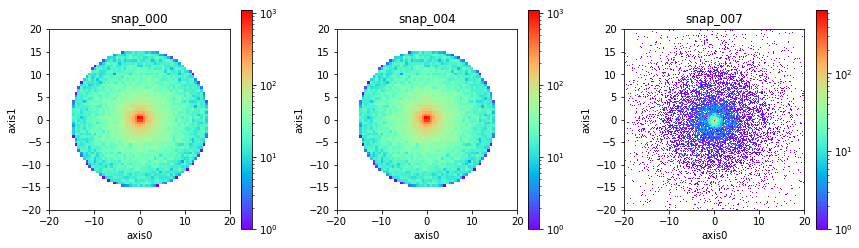

In [31]:
%%time
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
h2(snap_listD[4].pos.T[0], snap_listD[4].pos.T[1], 50, name="snap_000").plot("image", alpha=1, ax=axes[0], cmap="rainbow", show_colorbar=True, cmap_normalize="log")
h2(snap_listD[4].pos.T[0], snap_listD[4].pos.T[1], 50, name="snap_004").plot("image", alpha=1, ax=axes[1], cmap="rainbow", cmap_normalize="log")
h2(snap_listD[5].pos.T[0], snap_listD[5].pos.T[1], 50*100, name="snap_007").plot("image", alpha=1, ax=axes[2], cmap="rainbow", cmap_normalize="log");
for ax in axes:
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_aspect(1)

## Large $\epsilon$

In [32]:
var = {}
for n in range(8):
    var[n] = "eps/snap_large/snapshot_00%s" % n

In [33]:
%%time
snap_listL = {}
for snap in var:
    with open(var[snap], "rb") as binary_file:
        data = binary_file.read()
    snap_listL[snap] = GadgetSnapshot()
    snap_listL[snap].parse(data)

Wall time: 2.14 s


Wall time: 3.49 s


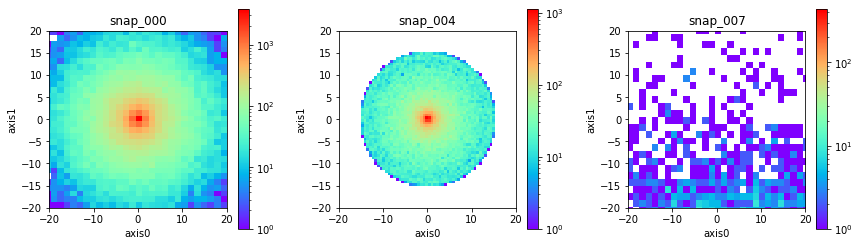

In [37]:
%%time
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
h2(snap_listL[0].pos.T[0], snap_listL[0].pos.T[1], 50, name="snap_000").plot("image", alpha=1, ax=axes[0], cmap="rainbow", show_colorbar=True, cmap_normalize="log")
h2(snap_listL[4].pos.T[0], snap_listL[4].pos.T[1], 50, name="snap_004").plot("image", alpha=1, ax=axes[1], cmap="rainbow", cmap_normalize="log")
h2(snap_listL[7].pos.T[0], snap_listL[7].pos.T[1], 50*100, name="snap_007").plot("image", alpha=1, ax=axes[2], cmap="rainbow", cmap_normalize="log");
for ax in axes:
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_aspect(1)

## Small $\epsilon$

In [38]:
var = {}
for n in range(8):
    var[n] = "eps/snap_smaller/snapshot_00%s" % n

In [39]:
%%time
snap_listS = {}
for snap in var:
    with open(var[snap], "rb") as binary_file:
        data = binary_file.read()
    snap_listS[snap] = GadgetSnapshot()
    snap_listS[snap].parse(data)

Wall time: 2.29 s


Wall time: 3.21 s


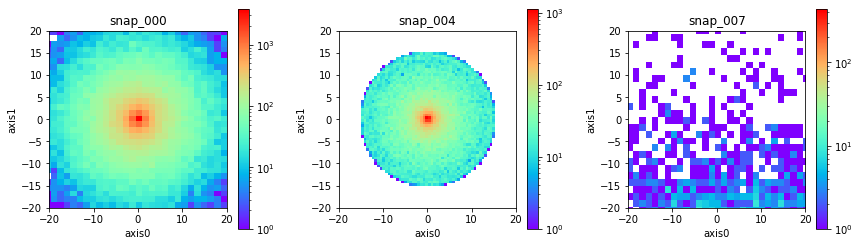

In [41]:
%%time
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
h2(snap_listS[0].pos.T[0], snap_listS[0].pos.T[1], 50, name="snap_000").plot("image", alpha=1, ax=axes[0], cmap="rainbow", show_colorbar=True, cmap_normalize="log")
h2(snap_listS[4].pos.T[0], snap_listS[4].pos.T[1], 50, name="snap_004").plot("image", alpha=1, ax=axes[1], cmap="rainbow", cmap_normalize="log")
h2(snap_listS[7].pos.T[0], snap_listS[7].pos.T[1], 50*100, name="snap_007").plot("image", alpha=1, ax=axes[2], cmap="rainbow", cmap_normalize="log");
for ax in axes:
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_aspect(1)

# Okay, well these ALL look VERY identical...

In [42]:
if snap_listD[0].pos.all() == snap_listL[0].pos.all() == snap_listS[0].pos.all():
    print("These are ALL identical in [pos] value.")
else:
    print("Not the same in [pos].")
    
if snap_listD[0].vel.all() == snap_listL[0].vel.all() == snap_listS[0].vel.all():
    print("These are ALL identical in [vel] value.")
else:
    print("Not the same in [vel].")

These are ALL identical in [pos] value.
These are ALL identical in [vel] value.


# Let's try it with the $\eta$ parameter instead...

In [73]:
var = {}
for n in range(4):
    var[n] = "eta/small/snapshot_00%s" % n

In [74]:
%%time
snap_listS = {}
for snap in var:
    with open(var[snap], "rb") as binary_file:
        data = binary_file.read()
    snap_listS[snap] = GadgetSnapshot()
    snap_listS[snap].parse(data)

Wall time: 1.11 s


## Small $\eta$

Wall time: 3.29 s


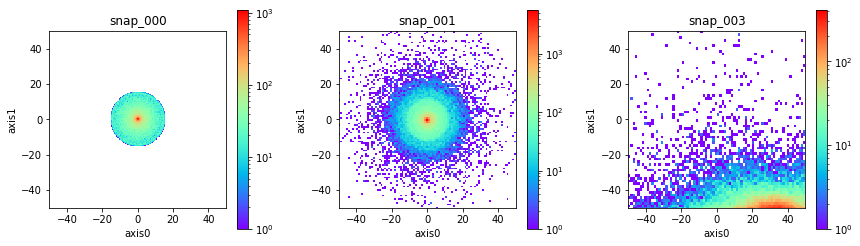

In [75]:
%%time
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
h2(snap_listS[0].pos.T[0], snap_listS[0].pos.T[1], 50, name="snap_000").plot("image", alpha=1, ax=axes[0], cmap="rainbow", show_colorbar=True, cmap_normalize="log")
h2(snap_listS[1].pos.T[0], snap_listS[1].pos.T[1], 50*10, name="snap_001").plot("image", alpha=1, ax=axes[1], cmap="rainbow", cmap_normalize="log")
h2(snap_listS[2].pos.T[0], snap_listS[2].pos.T[1], 50*100, name="snap_003").plot("image", alpha=1, ax=axes[2], cmap="rainbow", cmap_normalize="log");
for ax in axes:
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
    ax.set_aspect(1)

## Large $\eta$

In [76]:
var = {}
for n in range(4):
    var[n] = "eta/large/snapshot_00%s" % n

In [77]:
%%time
snap_listL = {}
for snap in var:
    with open(var[snap], "rb") as binary_file:
        data = binary_file.read()
    snap_listL[snap] = GadgetSnapshot()
    snap_listL[snap].parse(data)

Wall time: 1.13 s


Wall time: 3.64 s


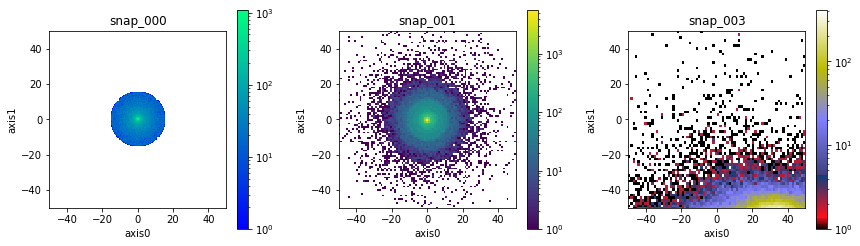

In [86]:
%%time
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
h2(snap_listL[0].pos.T[0], snap_listL[0].pos.T[1], 50, name="snap_000").plot("image", alpha=1, ax=axes[0], cmap="winter", show_colorbar=True, cmap_normalize="log")
h2(snap_listL[1].pos.T[0], snap_listL[1].pos.T[1], 50*10, name="snap_001").plot("image", alpha=1, ax=axes[1], cmap="viridis", cmap_normalize="log")
h2(snap_listL[2].pos.T[0], snap_listL[2].pos.T[1], 50*100, name="snap_003").plot("image", alpha=1, ax=axes[2], cmap="gist_stern", cmap_normalize="log");
for ax in axes:
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
    ax.set_aspect(1)

#    

#   

# Now for really dumb manipulation of the central black hole's MASS!!!

# Smaller mass value, 1.0 versus 1000.0 standard (solar mass?)